# Librerías
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sym
from scipy.integrate import odeint

## Def. Funciones:

In [17]:
def f(x,y):
    return x + 2*y
def sol(x):
    return -0.5*x - (1-np.exp(2*x))/4


def RungeKutta4(x,y,h,f):

    for i in range(1,len(x)):

        k1 = f(x[i-1],y[i-1])
        k2= f(x[i-1]+0.5*h,y[i-1]+0.5*h*k1)
        k3= f(x[i-1]+0.5*h,y[i-1]+0.5*h*k2)
        k4 = f(x[i-1]+h,y[i-1]+k3*h)

        y[i] = y[i-1] + (1/6)*h*(k1+2*k2+2*k3+k4)

def GetAdams_45(f,x,yrk1):

    h = x[1] - x[0]
    y = yrk1.copy()
    yc = y.copy()

    for i in range(1,len(x)):
        #Bashfort 4 puntos
        y[i] = y[i-1] +(1/24)*h*(55*f(x[i-4],y[i-4])-59*f(x[i-3],y[i-3])+37*f(x[i-2],y[i-2])-9*f(x[i-1],y[i-1]))

        yc[i] = y[i]
        #Bashfort Multoun 5 puntos
        yc[i] = yc[i-1] +(1/720)*h*(251*f(x[i],y[i])+646*f(x[i-4],y[i-4])-264*f(x[i-3],y[i-3])+106*f(x[i-2],y[i-2])-19*f(x[i-1],y[i-1]))


    return y,yc

## Coeficientes:

In [30]:
t = np.linspace(0.,4.,100)
h = t[1] - t[0]
yext = sol(t)

## Integración:

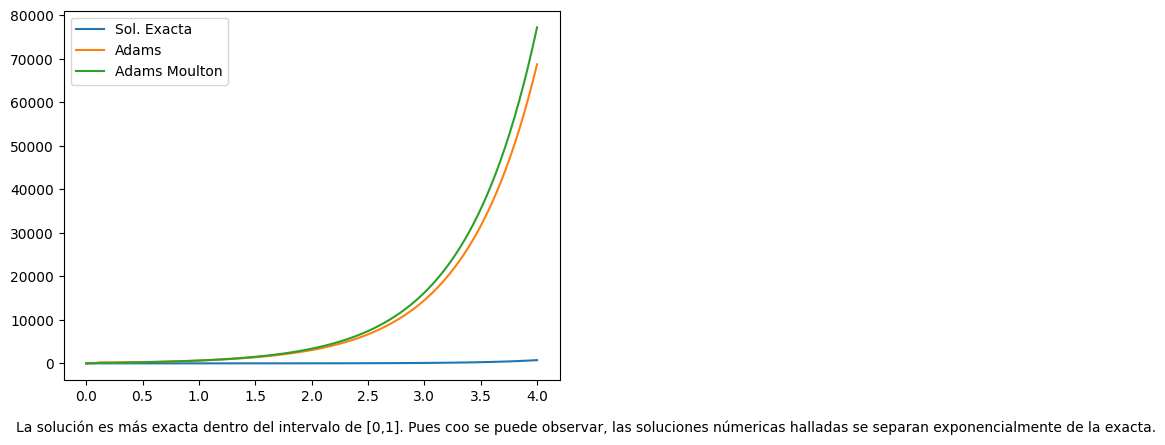

In [32]:
y4 = np.zeros_like(t)
y4[0] = 0
RungeKutta4(t,y4,h,f)



ybash2,ymoulton2 = GetAdams_45(f,t,y4)
plt.plot(t,yext,label='Sol. Exacta')
plt.plot(t,ybash2,label='Adams')
plt.plot(t,ymoulton2,label='Adams Moulton')
plt.figtext(0.05,0.002,"La solución es más exacta dentro del intervalo de [0,1]. Pues coo se puede observar, las soluciones númericas halladas se separan exponencialmente de la exacta.")
plt.legend()